In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors
import geopandas as gpd
import commot as ct
import sys
sys.path.append('/wsfish/glioblastoma/')
import FISHspace as sp

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
gliosarcoma_palette = {
    'RG-like': '#93faa5',
    'nIPC-RG-like': '#93faa5',
    
    'FB-like 3': '#89c4f4',#'#FF6EC7',
    'FB-like 1': '#89c4f4',#'#FF6EC7',
    
    'GW-like 2': '#EDE8F3',
    'GW-like 3': '#E2D8EA',
    'GW-like 1': '#D6BEDD',
    'GW-like 5': '#CFA8D1',
    'GW-like 4': '#CA90C5',
    'GW-like 7': '#D873B6',

    'GW-like 8': '#C50F53',
    'GW-like 6': '#d2527f',

    'Endothelial 1': '#8c14fc',
    
    'AC-like 1':'#f2784b',
    'AC-like 2':'#f2784b',
    'AC-like 3':'#f2784b',
    'AC-like 4':'#f2784b',
    'AC-like 5':'#f2784b', 
    'AC-like 6':'#f2784b', 
    
}

In [5]:
adata= sc.read_h5ad('/wsfish/glioblastoma/EEL/DataSubmission/GBM_Linnarsson_EEL.h5ad')

In [6]:
adata

AnnData object with n_obs × n_vars = 6139386 × 878
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80'
    var: 'Accession', 'Gene'
    obsm: 'spatial'

In [7]:
clusters = ['AC-like 5', 'AC-like 6', 'FB-like 3', 'RG-like', 'nIPC-RG-like','GW-like 6', 'GW-like 8', 'Endothelial 1']
cluster_key = 'm-states'
k = 6

In [8]:
sadata = adata[adata.obs.Sample == 'SL020']

In [10]:
sadata[sadata.obs['m-states'].isin(clusters)]

View of AnnData object with n_obs × n_vars = 36653 × 878
    obs: 'Area', 'CellID', 'Centroid', 'Polygons', 'Sample', 'X', 'Y', 'batch', 'ID', 'CellularNgh', 'm-states', 'm-states80'
    var: 'Accession', 'Gene'
    obsm: 'spatial'

In [11]:
adata_vf = sp.spatial.trajectory.vector_alpha(
    adata,
    sample='SL020',
    cluster_key='m-states',
    clusters = [
        'AC-like 5','AC-like 6', 'FB-like 3', 'RG-like', 'nIPC-RG-like', 'GW-like 6', 'GW-like 8', 'Endothelial 1','GW-like 2'
    ],
    k = 1,
    spacing=50, # hexbin spacing
    min_count=5,
    direction=1,
    copy=True,
    alpha_nn = 3,
    grid_density=.99, 
    normalize_v=True,

    #remove_negative_values=True,
    #min_z = 10,
    
)

  0%|          | 0/1000 [00:00<?, ?/s]

(711, 2)
(711, 2)


In [12]:
alpha2 = adata_vf.obsm['alpha']
alpha2[alpha2 <=0.7] = 0.1
adata_vf.obsm['alpha2'] = alpha2


In [13]:
adata_vf = sp.spatial.trajectory.vector_alpha(
    adata,
    sample='SL020',
    cluster_key='m-states',
    clusters = [
        'AC-like 5', 'AC-like 6', 'FB-like 3', 'RG-like', 'nIPC-RG-like', 'GW-like 6', 'GW-like 8', 'Endothelial 1','GW-like 2'
    ],
    k = 1,
    direction=-1,
    copy=True,
    alpha_nn = 1,
    grid_density=1, 
    normalize_v=False,
    #remove_negative_values=True,
    #min_z = 5,
    
)

  0%|          | 0/1000 [00:00<?, ?/s]

(824, 2)
(824, 2)


/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


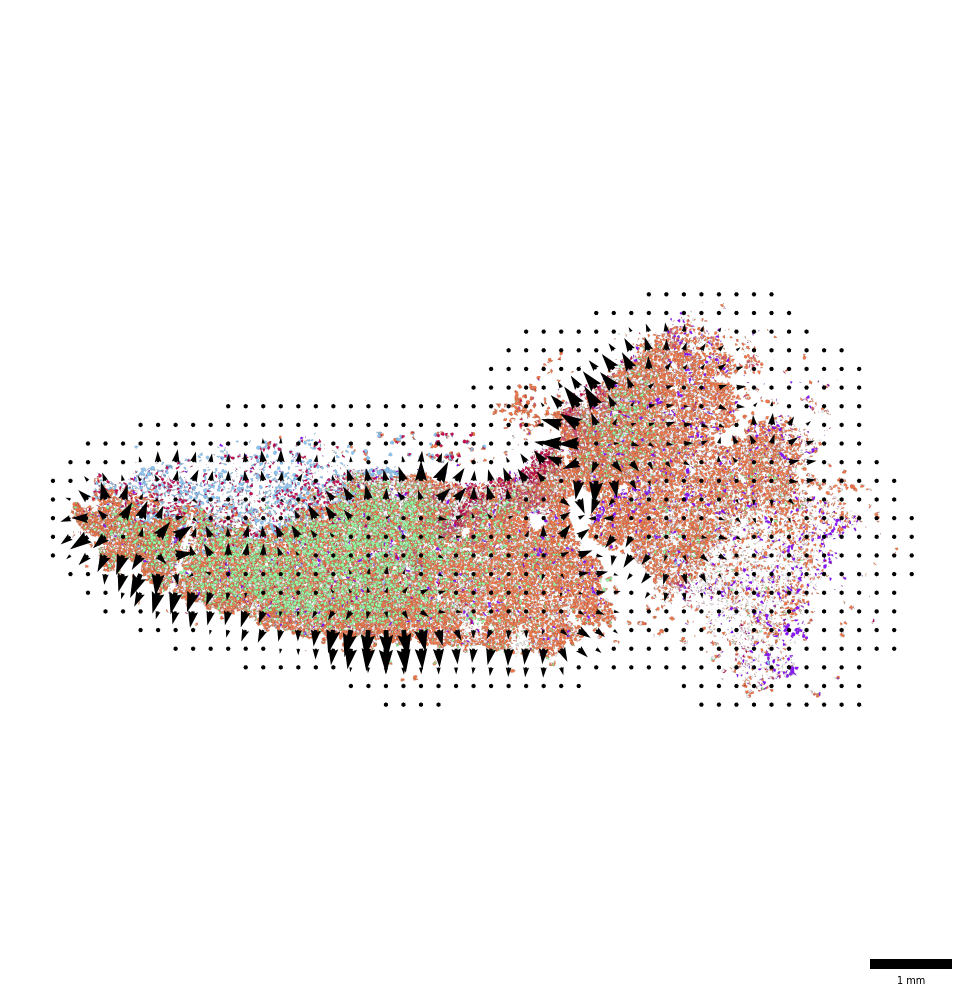

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10) )
sp.pl.plot_polygons(
    adata,
    sample = 'SL020',
    cluster_key='m-states',
    clusters=['AC-like 5', 'nIPC-RG-like', 'Endothelial 1', 'FB-like 3', 'GW-like 6', 'GW-like 8', 'GW-like 2'],
    area_min_size=5,
    alpha=1,
    palette= gliosarcoma_palette,
    save=True,
    ax = ax
        
)

sp.pl.spatialtrajectory(
    adata_vf,
    plot_method='grid',
    grid_width=0.005,
    arrow_color='black',
    #grid_scale=.1,
    normalize_v=False,
    grid_density=1, 
    scale=50,
    ax = ax,
)
plt.show()

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


0.034753446571631846 0.0


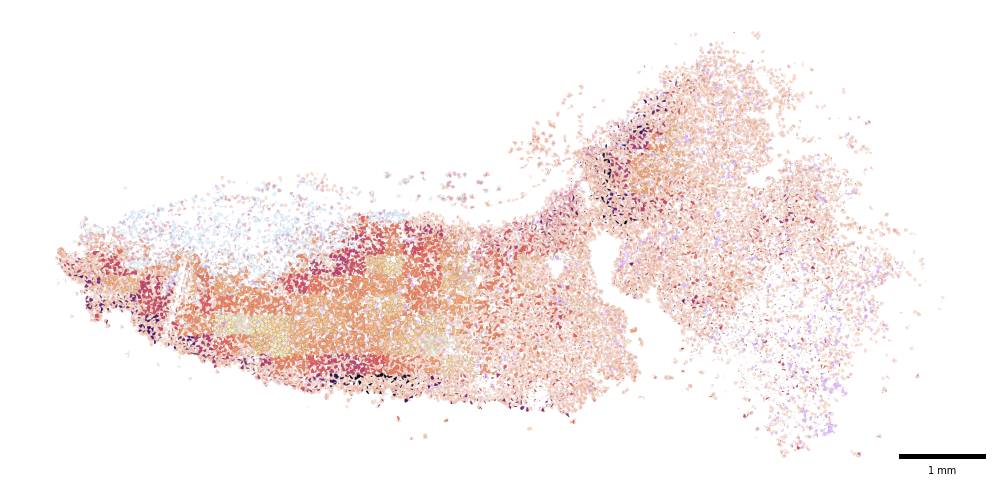

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10) )

sp.pl.plot_polygons(
    adata,
    sample = 'SL020',
    cluster_key='m-states',
    clusters=[ 'AC-like 6', 'AC-like 5', 'nIPC-RG-like','RG-like', 'Endothelial 1', 'FB-like 3', 'GW-like 6', 'GW-like 8', 'GW-like 2'],
    area_min_size=5,
    alpha=.25 ,
    palette= gliosarcoma_palette,
    save=True,
    ax = ax
    #figsize=(20,20),
    #savepath='figures/SL020.svg'
        
)

sp.pl.plot_polygons_obsm(
    adata_vf,
    key='alpha',
    sample = 'SL020',
    cluster_key='m-states',
    clusters=['nIPC-RG-like'],
    cmap='magma_r',
    plot_grays=False,
    area_min_size=5,
    alpha=1,
    normalize_values=True,
    normalize_values_quant=0.999,
    bgval_quant=0.01,
    ax = ax,
        
)
plt.show()

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


0.09945133623703566 0.0


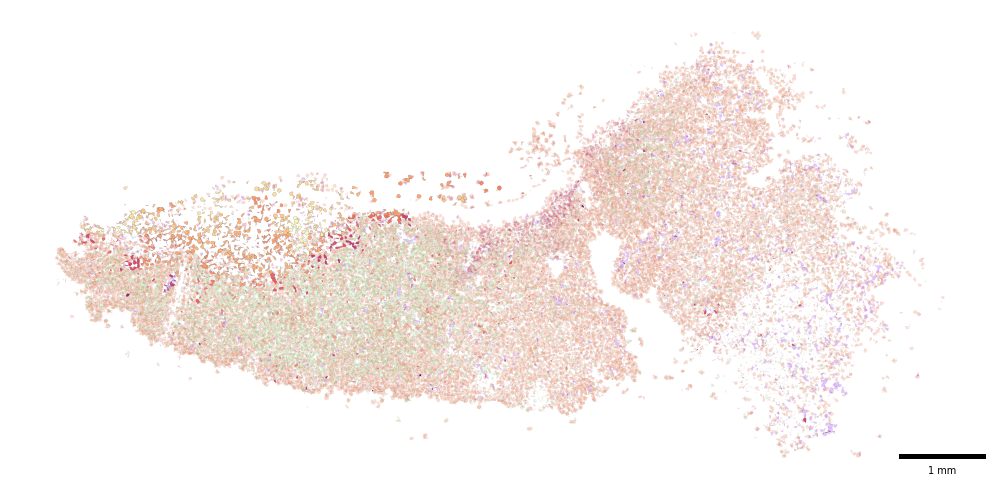

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10) )

sp.pl.plot_polygons(
    adata,
    sample = 'SL020',
    cluster_key='m-states',
    clusters=[ 'AC-like 6', 'AC-like 5', 'nIPC-RG-like','RG-like', 'Endothelial 1', 'FB-like 3', 'GW-like 6', 'GW-like 8', 'GW-like 2'],
    area_min_size=5,
    alpha=.25 ,
    palette= gliosarcoma_palette,
    save=True,
    ax = ax        
)

sp.pl.plot_polygons_obsm(
    adata_vf,
    key='alpha',
    sample = 'SL020',
    cluster_key='m-states',
    clusters=['FB-like 3'],
    cmap='magma_r',
    plot_grays=False,
    area_min_size=5,
    alpha=1,
    normalize_values=True,
    normalize_values_quant=0.999,
    bgval_quant=0.01,
    ax = ax,
        
)
plt.show()

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


0.029357929637255052 0.0029357929637255057


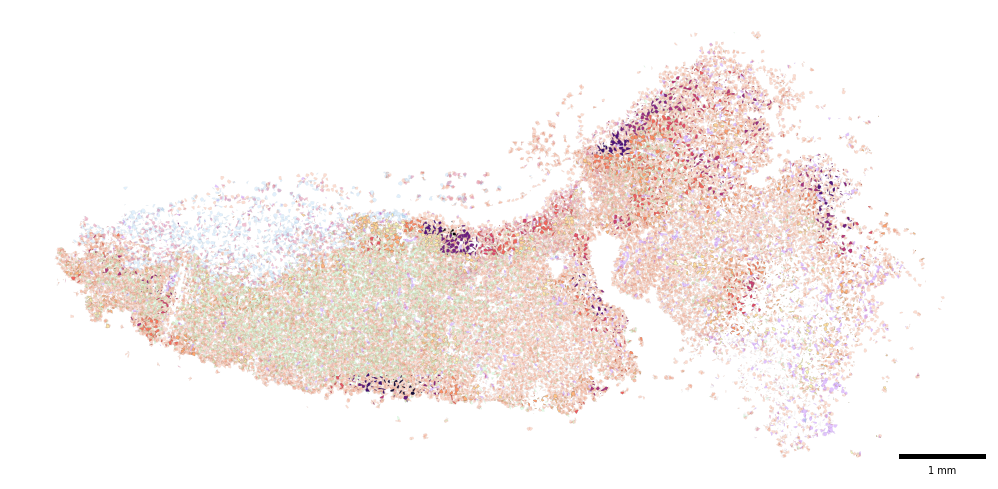

In [93]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10) )

sp.pl.plot_polygons(
    adata,
    sample = 'SL020',
    cluster_key='m-states',
    clusters=[ 'AC-like 6', 'AC-like 5', 'nIPC-RG-like','RG-like', 'Endothelial 1', 'FB-like 3', 'GW-like 6', 'GW-like 8', 'GW-like 2'],
    area_min_size=5,
    alpha=.25 ,
    palette= gliosarcoma_palette,
    save=True,
    ax = ax
    #figsize=(20,20),
    #savepath='figures/SL020.svg'
        
)

sp.pl.plot_polygons_obsm(
    adata_vf,
    key='alpha',
    sample = 'SL020',
    cluster_key='m-states',
    clusters=['GW-like 2'],
    cmap='magma_r',
    plot_grays=False,
    area_min_size=5,
    alpha=1,
    normalize_values=True,
    normalize_values_quant=0.999,
    bgval_quant=0.01,
    ax = ax,
        
)
plt.show()

/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/home/alejandro/miniconda3/envs/py39/lib/python3.9/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


0.04405764081171977 0.0044057640811719775


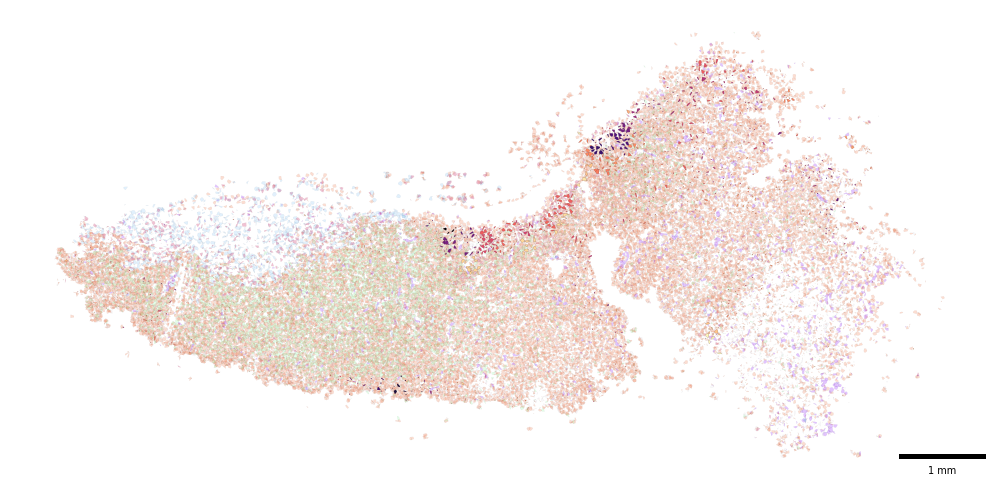

In [94]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10) )

sp.pl.plot_polygons(
    adata,
    sample = 'SL020',
    cluster_key='m-states',
    clusters=[ 'AC-like 6', 'AC-like 5', 'nIPC-RG-like','RG-like', 'Endothelial 1', 'FB-like 3', 'GW-like 6', 'GW-like 8', 'GW-like 2'],
    area_min_size=5,
    alpha=.25 ,
    palette= gliosarcoma_palette,
    save=True,
    ax = ax
    #figsize=(20,20),
    #savepath='figures/SL020.svg'
        
)

sp.pl.plot_polygons_obsm(
    adata_vf,
    key='alpha',
    sample = 'SL020',
    cluster_key='m-states',
    clusters=['GW-like 6'],
    cmap='magma_r',
    plot_grays=False,
    area_min_size=5,
    alpha=1,
    normalize_values=True,
    normalize_values_quant=0.999,
    bgval_quant=0.01,
    ax = ax,

        
)
plt.show()